In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('C:/Users/stoh/Downloads/Impact_of_Remote_Work_on_Mental_Health.csv', keep_default_na = True)

In [3]:
df.drop('Employee_ID', axis=1, inplace= True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Age                                5000 non-null   int64 
 1   Gender                             5000 non-null   object
 2   Job_Role                           5000 non-null   object
 3   Industry                           5000 non-null   object
 4   Years_of_Experience                5000 non-null   int64 
 5   Work_Location                      5000 non-null   object
 6   Hours_Worked_Per_Week              5000 non-null   int64 
 7   Number_of_Virtual_Meetings         5000 non-null   int64 
 8   Work_Life_Balance_Rating           5000 non-null   int64 
 9   Stress_Level                       5000 non-null   object
 10  Mental_Health_Condition            3804 non-null   object
 11  Access_to_Mental_Health_Resources  5000 non-null   object
 12  Produc

In [5]:
df['Mental_Health_Condition'].fillna('Not mention', inplace= True)
df['Mental_Health_Condition'].value_counts()

C:\Users\stoh\AppData\Local\Temp\ipykernel_49180\328627377.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Mental_Health_Condition'].fillna('Not mention', inplace= True)


Mental_Health_Condition
Burnout        1280
Anxiety        1278
Depression     1246
Not mention    1196
Name: count, dtype: int64

In [6]:
df['Physical_Activity'].fillna(df['Physical_Activity'].mode()[0], inplace= True)
df['Physical_Activity'].value_counts()

C:\Users\stoh\AppData\Local\Temp\ipykernel_49180\894136384.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Physical_Activity'].fillna(df['Physical_Activity'].mode()[0], inplace= True)


Physical_Activity
Weekly    3384
Daily     1616
Name: count, dtype: int64

In [7]:
df.isna().sum()

Age                                  0
Gender                               0
Job_Role                             0
Industry                             0
Years_of_Experience                  0
Work_Location                        0
Hours_Worked_Per_Week                0
Number_of_Virtual_Meetings           0
Work_Life_Balance_Rating             0
Stress_Level                         0
Mental_Health_Condition              0
Access_to_Mental_Health_Resources    0
Productivity_Change                  0
Social_Isolation_Rating              0
Satisfaction_with_Remote_Work        0
Company_Support_for_Remote_Work      0
Physical_Activity                    0
Sleep_Quality                        0
Region                               0
dtype: int64

In [8]:
duplicates = df[df.duplicated()]
print("Duplicate Rows:" , len(duplicates))
duplicates.head()

Duplicate Rows: 0


,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region


In [9]:
clus= df.copy()
clus

,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,Weekly,Poor,North America
3,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,Weekly,Poor,Europe
4,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,Not mention,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,32,Male,Sales,Consulting,4,Onsite,24,2,5,High,Burnout,Yes,Decrease,4,Neutral,1,Weekly,Average,Asia
4996,39,Female,Sales,Healthcare,27,Onsite,48,15,1,Low,Depression,Yes,Decrease,1,Satisfied,1,Weekly,Average,Africa
4997,42,Female,Sales,Healthcare,21,Hybrid,34,1,4,High,Burnout,No,Increase,3,Satisfied,1,Daily,Poor,Oceania
4998,27,Female,Sales,Healthcare,26,Remote,58,0,5,Low,Not mention,Yes,Increase,3,Unsatisfied,4,Daily,Average,Asia


In [10]:
num_cols= ['Age', 'Years_of_Experience', 'Hours_Worked_Per_Week','Number_of_Virtual_Meetings','Work_Life_Balance_Rating','Social_Isolation_Rating', 'Company_Support_for_Remote_Work']
tot_len= 0
for i in df.columns:
    if i not in num_cols:
        print(f'\033[31m{i.upper()}\033[0m'.center(50, ' '))
        print(clus[i].value_counts())
        tot_len= tot_len+ clus[i].nunique()
        print()
        print()

                 GENDER                  
Gender
Female               1274
Male                 1270
Prefer not to say    1242
Non-binary           1214
Name: count, dtype: int64


                JOB_ROLE                 
Job_Role
Project Manager      738
Sales                733
Designer             723
HR                   716
Software Engineer    711
Data Scientist       696
Marketing            683
Name: count, dtype: int64


                INDUSTRY                 
Industry
Finance          747
IT               746
Healthcare       728
Retail           726
Education        690
Manufacturing    683
Consulting       680
Name: count, dtype: int64


              WORK_LOCATION              
Work_Location
Remote    1714
Hybrid    1649
Onsite    1637
Name: count, dtype: int64


              STRESS_LEVEL               
Stress_Level
High      1686
Medium    1669
Low       1645
Name: count, dtype: int64


         MENTAL_HEALTH_CONDITION         
Mental_Health_Condition
Burnout        1

In [11]:
to_onehotencode= ['Region', 'Mental_Health_Condition', 'Work_Location', 'Industry', 'Job_Role', 'Gender']
ohe_prefix= ['region', 'mental', 'loc', 'ind', 'job', 'gen']
for i in range(len(to_onehotencode)):
    clus= clus.join(pd.get_dummies(clus[to_onehotencode[i]], prefix= ohe_prefix[i]).astype('int'))
    clus.drop(to_onehotencode[i], axis=1, inplace= True)

In [12]:
clus.columns= clus.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('-', '_')

In [13]:
def three_encode(df, col, x1, x2, x3, val1, val2, val3):
    return df[col].map({
        x1: val1,
        x2: val2,
        x3: val3
    })

def two_encode(df, col, val1):
    return df[col].apply(lambda x:1 if x==val1 else 0)

In [14]:
clus['sleep_quality']= three_encode(clus, 'sleep_quality', 'Poor','Average', 'Good', 0, 1, 2)
clus['satisfaction_with_remote_work']= three_encode(clus, 'satisfaction_with_remote_work', 'Unsatisfied','Neutral', 'Satisfied', 0, 1, 2)
clus['productivity_change']= three_encode(clus, 'productivity_change', 'Decrease','No Change', 'Increase', -1, 0, 1)
clus['stress_level']= three_encode(clus, 'stress_level', 'Low','Medium', 'High', 0, 1, 2)

In [15]:
clus['access_to_mental_health_resources']= two_encode(clus, 'access_to_mental_health_resources', 'Yes')
clus['physical_activity']= two_encode(clus, 'physical_activity', 'Daily')

In [16]:
clus

,age,years_of_experience,hours_worked_per_week,number_of_virtual_meetings,work_life_balance_rating,stress_level,access_to_mental_health_resources,productivity_change,social_isolation_rating,satisfaction_with_remote_work,...,job_designer,job_hr,job_marketing,job_project_manager,job_sales,job_software_engineer,gen_female,gen_male,gen_non_binary,gen_prefer_not_to_say
0,32,13,47,7,2,1,0,-1,1,0,...,0,1,0,0,0,0,0,0,1,0
1,40,3,52,4,1,1,0,1,3,2,...,0,0,0,0,0,0,1,0,0,0
2,59,22,46,11,5,1,0,0,4,0,...,0,0,0,0,0,1,0,0,1,0
3,27,20,32,8,4,2,1,1,3,0,...,0,0,0,0,0,1,0,1,0,0
4,49,32,35,12,2,2,1,-1,3,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,32,4,24,2,5,2,1,-1,4,1,...,0,0,0,0,1,0,0,1,0,0
4996,39,27,48,15,1,0,1,-1,1,2,...,0,0,0,0,1,0,1,0,0,0
4997,42,21,34,1,4,2,0,1,3,2,...,0,0,0,0,1,0,1,0,0,0
4998,27,26,58,0,5,0,1,1,3,0,...,0,0,0,0,1,0,1,0,0,0


In [17]:
cat_cols=[]
for i in clus.columns:
    if i not in num_cols:
        cat_cols.append(i)

In [18]:
clus.columns = clus.columns.str.lower()
num_cols = [col.lower() for col in num_cols]
df.columns = df.columns.str.lower()
num_cols = [col.lower() for col in num_cols]


In [19]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
clus_num = clus[num_cols]
clus_cat = clus[cat_cols]

clus_num_sc = sc.fit_transform(clus_num)
clus_sc= pd.DataFrame(clus_num_sc, columns= clus_num.columns)
clus_sc= pd.concat([clus_sc, clus_cat.reset_index(drop=True)], axis=1)

clus_sc

,age,years_of_experience,hours_worked_per_week,number_of_virtual_meetings,work_life_balance_rating,social_isolation_rating,company_support_for_remote_work,age,years_of_experience,hours_worked_per_week,...,job_designer,job_hr,job_marketing,job_project_manager,job_sales,job_software_engineer,gen_female,gen_male,gen_non_binary,gen_prefer_not_to_say
0,-0.796378,-0.480088,0.622767,-0.120587,-0.697830,-1.429785,-1.435264,32,13,47,...,0,1,0,0,0,0,0,0,1,0
1,-0.088093,-1.478151,1.044388,-0.767744,-1.406862,0.004446,-0.720420,40,3,52,...,0,0,0,0,0,0,1,0,0,0
2,1.594083,0.418168,0.538443,0.742290,1.429268,0.721562,1.424112,59,22,46,...,0,0,0,0,0,1,0,0,1,0
3,-1.239056,0.218556,-0.642094,0.095132,0.720235,0.004446,-0.005576,27,20,32,...,0,0,0,0,0,1,0,1,0,0
4,0.708727,1.416231,-0.389122,0.958009,-0.697830,0.004446,-0.005576,49,32,35,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-0.796378,-1.378345,-1.316687,-1.199183,1.429268,0.721562,-1.435264,32,4,24,...,0,0,0,0,1,0,0,1,0,0
4996,-0.176629,0.917200,0.707091,1.605166,-1.406862,-1.429785,-1.435264,39,27,48,...,0,0,0,0,1,0,1,0,0,0
4997,0.088978,0.318362,-0.473446,-1.414902,0.720235,0.004446,-1.435264,42,21,34,...,0,0,0,0,1,0,1,0,0,0
4998,-1.239056,0.817393,1.550332,-1.630621,1.429268,0.004446,0.709268,27,26,58,...,0,0,0,0,1,0,1,0,0,0


2   0.3429481702116746
3   0.3776504547941224
4   0.4056169925257497
5   0.3809017505661983
6   0.3541965227383144
7   0.35117528394566866
8   0.3594313963157217
9   0.36780690982150377
10   0.3683986610679979


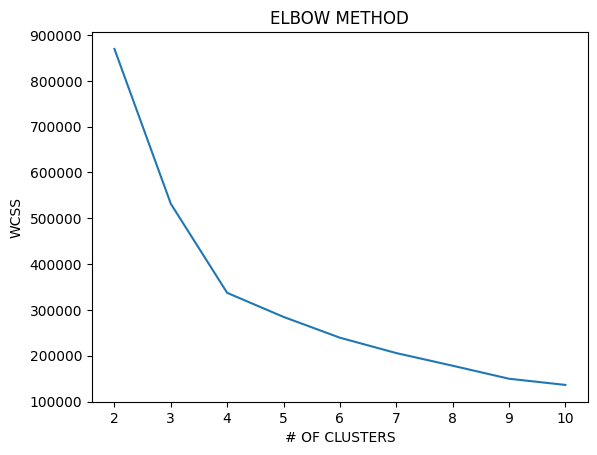

In [20]:
from sklearn.decomposition import PCA
pca= PCA(n_components= 2)
clus_pca= pca.fit_transform(clus_sc)

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
wcss=[]
for i in range(2, 11):
    km= KMeans(n_clusters= i)
    km.fit(clus_pca)
    print(i, " ", silhouette_score(clus_pca, km.labels_))
    wcss.append(km.inertia_)
    
plt.plot(range(2, 11), wcss)
plt.title('ELBOW METHOD')
plt.xlabel('# OF CLUSTERS')
plt.ylabel('WCSS')
plt.show()

In [21]:
km= KMeans(n_clusters=3)
km.fit(clus_pca)
y_pred= km.predict(clus_pca)
df['cluster']= y_pred
df

,age,gender,job_role,industry,years_of_experience,work_location,hours_worked_per_week,number_of_virtual_meetings,work_life_balance_rating,stress_level,mental_health_condition,access_to_mental_health_resources,productivity_change,social_isolation_rating,satisfaction_with_remote_work,company_support_for_remote_work,physical_activity,sleep_quality,region,cluster
0,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe,1
1,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia,1
2,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,Weekly,Poor,North America,2
3,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,Weekly,Poor,Europe,0
4,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,Not mention,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,32,Male,Sales,Consulting,4,Onsite,24,2,5,High,Burnout,Yes,Decrease,4,Neutral,1,Weekly,Average,Asia,0
4996,39,Female,Sales,Healthcare,27,Onsite,48,15,1,Low,Depression,Yes,Decrease,1,Satisfied,1,Weekly,Average,Africa,1
4997,42,Female,Sales,Healthcare,21,Hybrid,34,1,4,High,Burnout,No,Increase,3,Satisfied,1,Daily,Poor,Oceania,0
4998,27,Female,Sales,Healthcare,26,Remote,58,0,5,Low,Not mention,Yes,Increase,3,Unsatisfied,4,Daily,Average,Asia,1


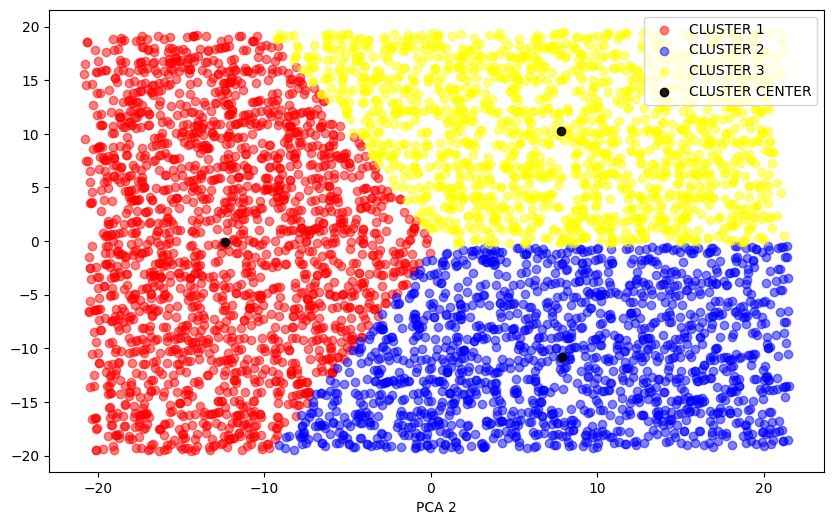

In [22]:
plt.figure(figsize=(10,6))
plt.scatter(clus_pca[y_pred==0, 0], clus_pca[y_pred==0, 1], color='red', label='CLUSTER 1', alpha= 0.5)
plt.scatter(clus_pca[y_pred==1, 0], clus_pca[y_pred==1, 1], color='blue', label='CLUSTER 2', alpha= 0.5)
plt.scatter(clus_pca[y_pred==2, 0], clus_pca[y_pred==2, 1], color='yellow', label='CLUSTER 3', alpha= 0.5)
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='black', label='CLUSTER CENTER', alpha= 0.9)
plt.legend()
plt.xlabel('PCA 1')
plt.xlabel('PCA 2')
plt.show()

In [23]:
num_cols.append('cluster')

In [24]:

df_cluster = df[num_cols].groupby('cluster').mean().T
df_cluster

cluster,0,1,2
age,41.086534,30.144211,51.089172
years_of_experience,18.547875,17.661476,17.032484
hours_worked_per_week,27.399898,47.370345,47.512739
number_of_virtual_meetings,7.634409,7.454299,7.563694
work_life_balance_rating,2.992832,2.981043,2.976433
social_isolation_rating,3.006144,3.014895,2.958599
company_support_for_remote_work,2.987199,2.972918,3.066242


In [25]:
clus_0 = df[df['cluster']==0]
clus_1 = df[df['cluster']==1]
clus_2 = df[df['cluster']==2]

In [26]:
def pie_chart(df, col, axes, clusterno):
    s= clusterno+ ' '+col
    cnts = df[col].value_counts()
    axes.pie(cnts, labels=cnts.index, autopct='%.1f%%', startangle=90)
    axes.set_title( s.upper(), fontsize=14, fontweight='bold')

In [27]:
def bar_plt(df, col, axes, clusterno):
    s= clusterno+ ' '+col
    cnts = df[col].value_counts().head(5)
    bars = axes.bar(cnts.index, cnts.values)
    axes.bar_label(bars)
    axes.set_title(s.upper(), fontsize=14, fontweight='bold')
    axes.get_yaxis().set_visible(False)
    axes.set_xlabel(col)

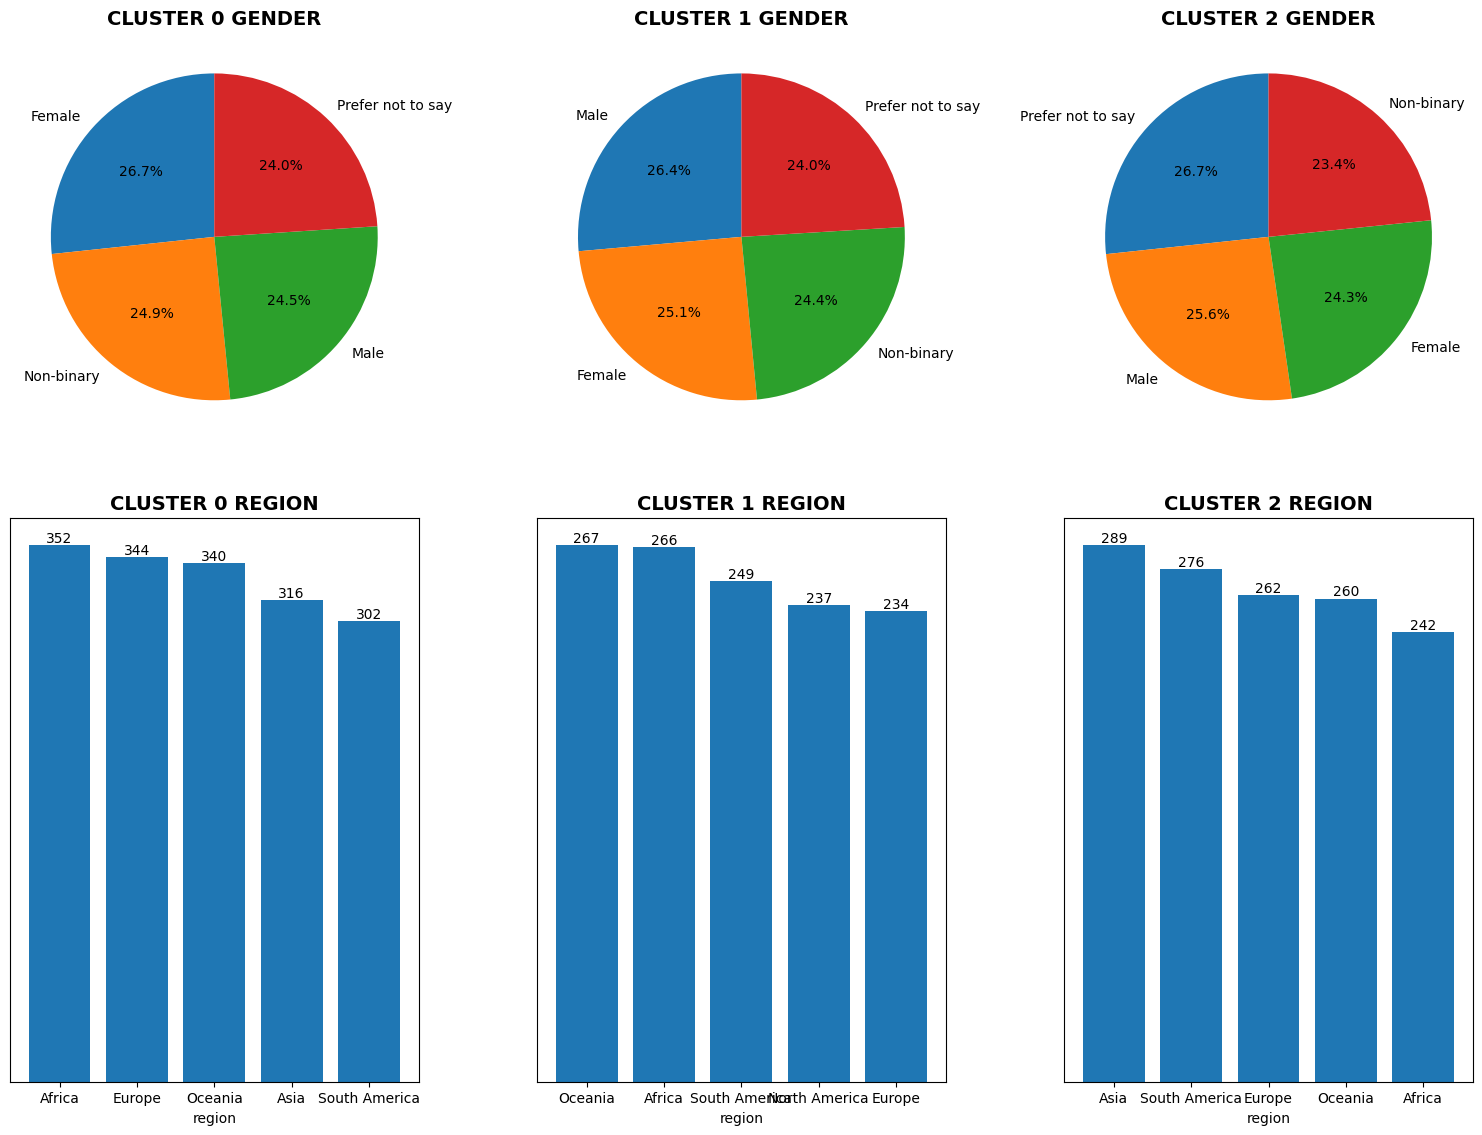

In [28]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 12))
pie_chart(clus_0, 'gender', axes[0, 0], 'cluster 0')
pie_chart(clus_1, 'gender', axes[0, 1], 'cluster 1')
pie_chart(clus_2, 'gender', axes[0, 2], 'cluster 2')


bar_plt(clus_0, 'region', axes[1, 0], 'cluster 0')
bar_plt(clus_1, 'region', axes[1, 1], 'cluster 1')
bar_plt(clus_2, 'region', axes[1, 2], 'cluster 2')

plt.tight_layout()
plt.show()

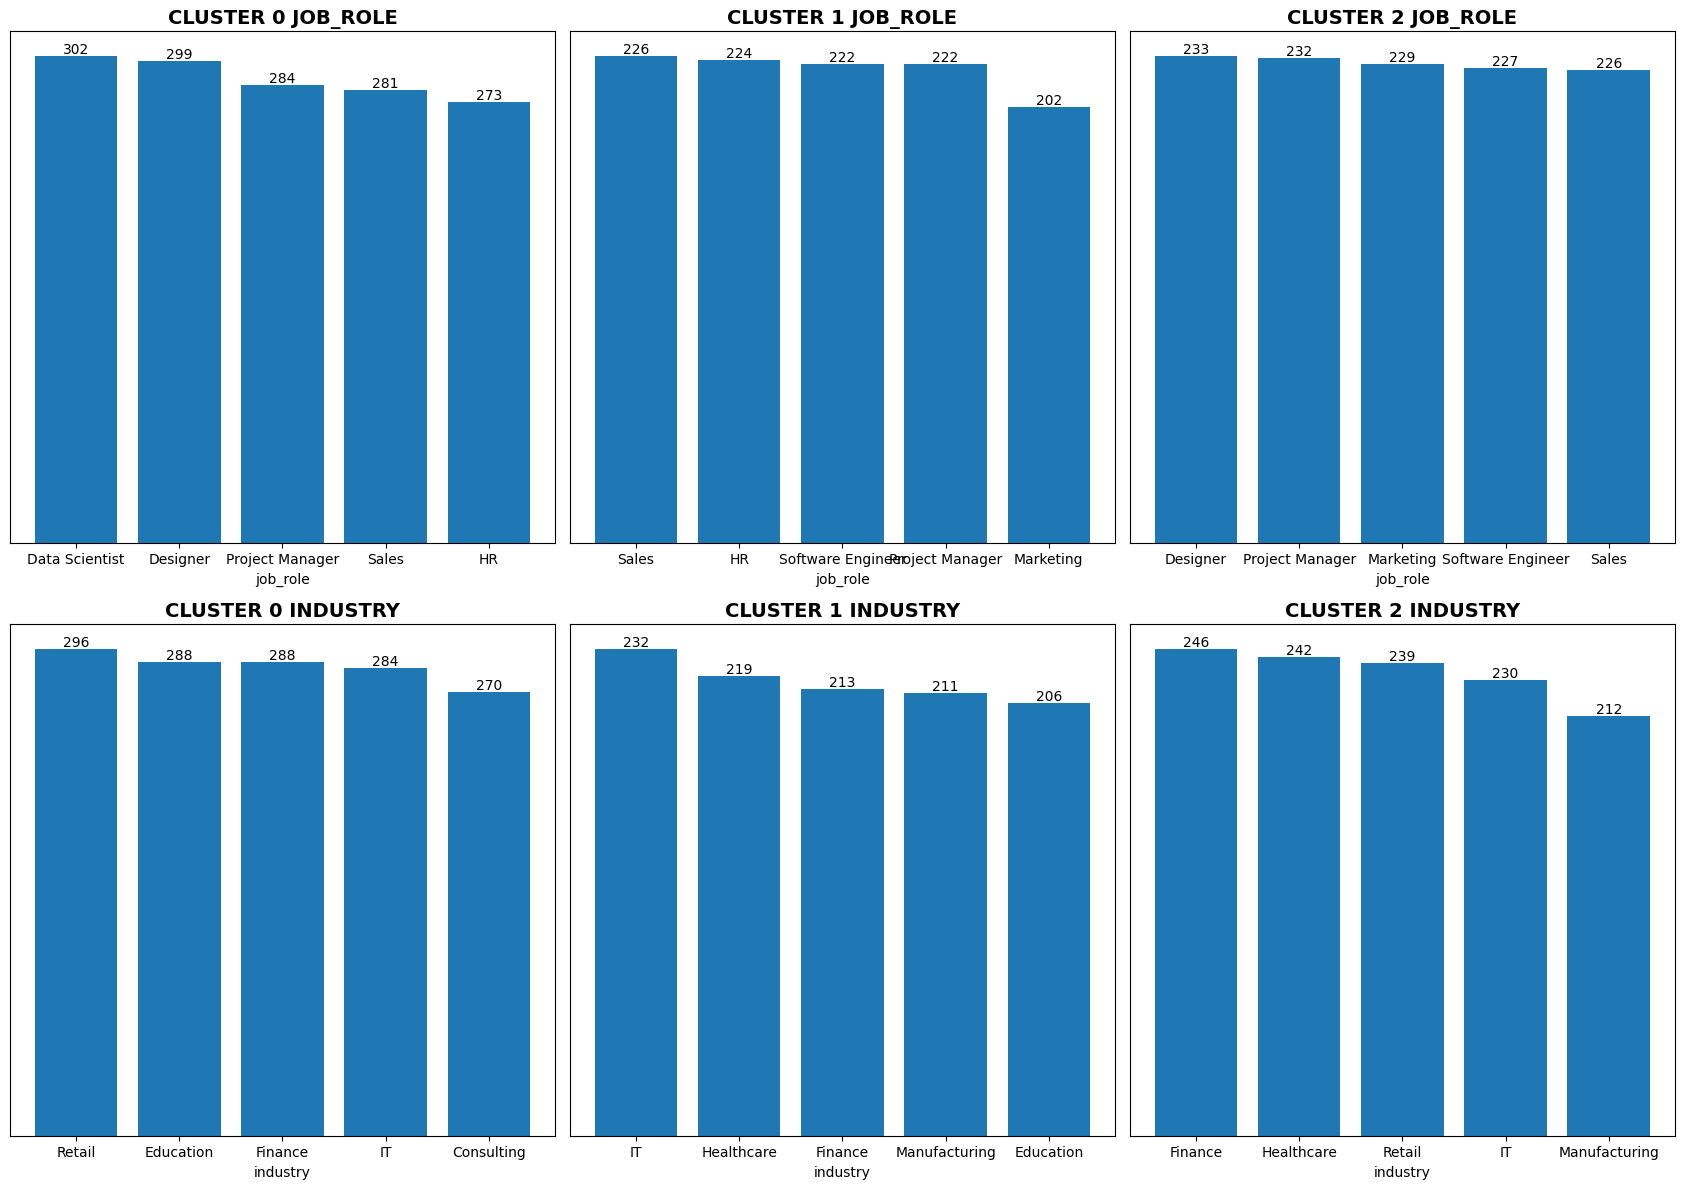

In [29]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(17, 12))
bar_plt(clus_0, 'job_role', axes[0, 0], 'cluster 0')
bar_plt(clus_1, 'job_role', axes[0, 1], 'cluster 1')
bar_plt(clus_2, 'job_role', axes[0, 2], 'cluster 2')


bar_plt(clus_0, 'industry', axes[1, 0], 'cluster 0')
bar_plt(clus_1, 'industry', axes[1, 1], 'cluster 1')
bar_plt(clus_2, 'industry', axes[1, 2], 'cluster 2')



plt.tight_layout()
plt.show()

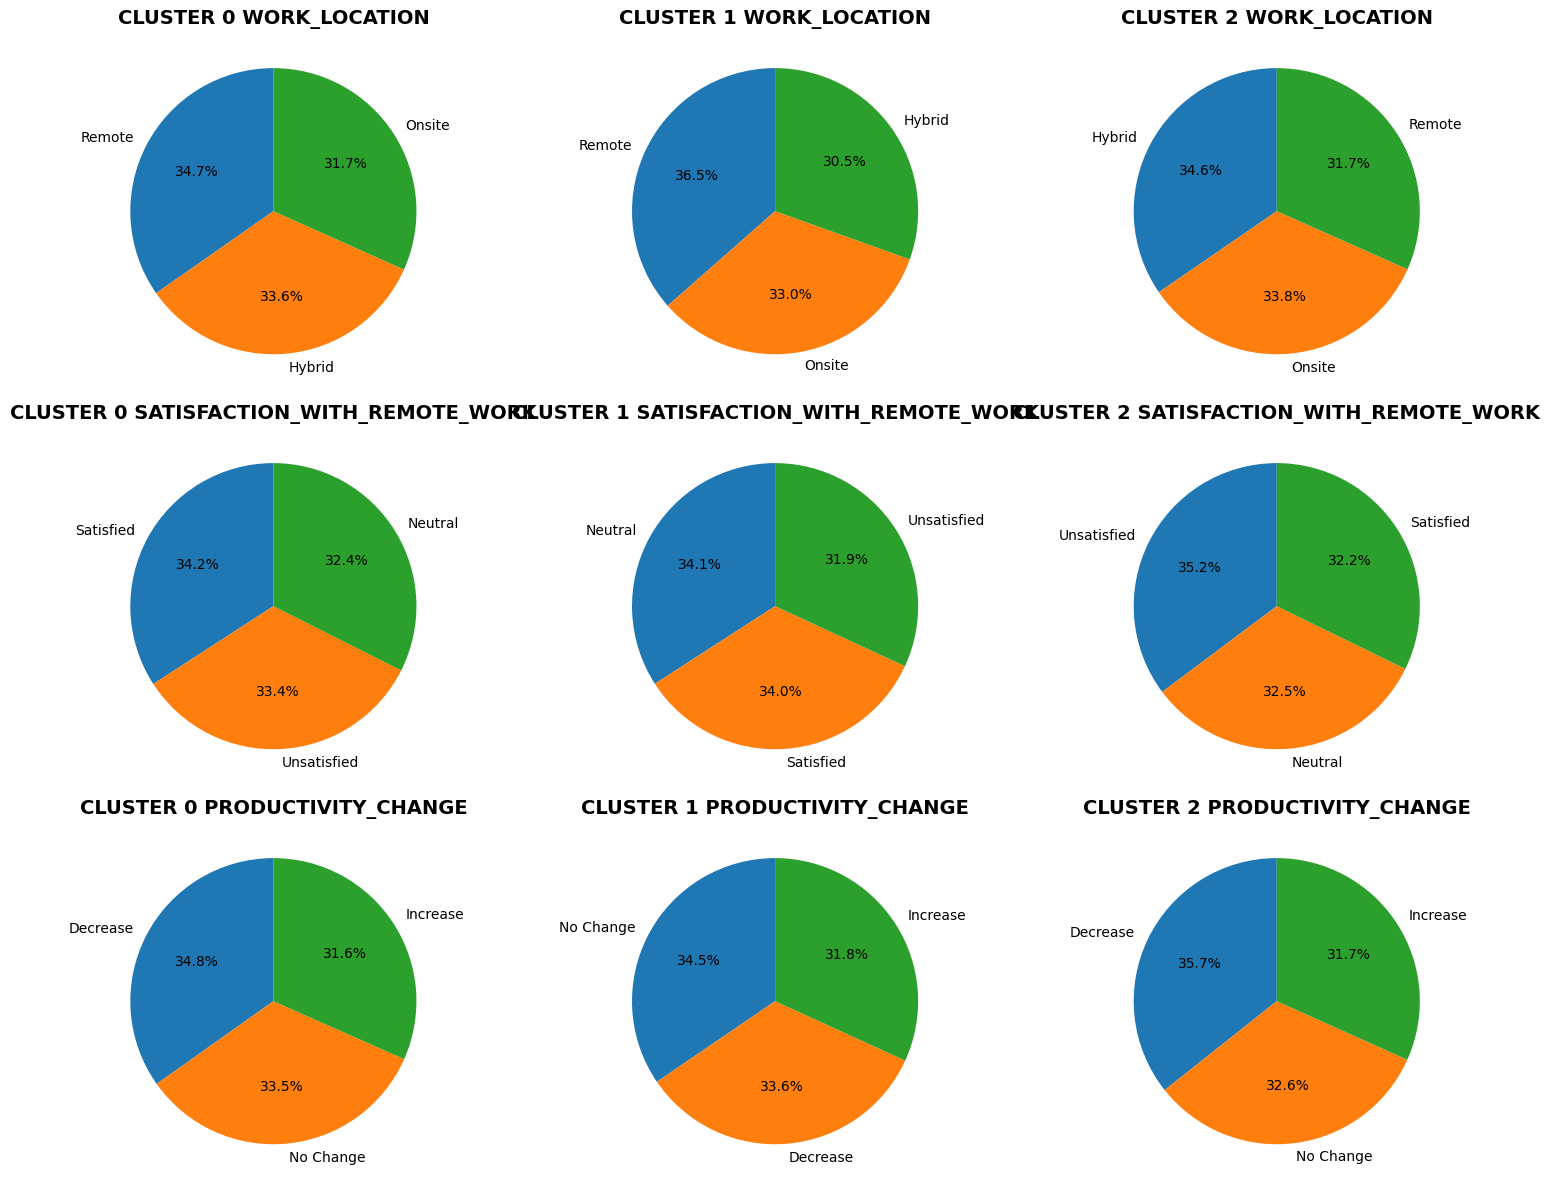

In [30]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
pie_chart(clus_0, 'work_location', axes[0, 0], 'cluster 0')
pie_chart(clus_1, 'work_location', axes[0, 1], 'cluster 1')
pie_chart(clus_2, 'work_location', axes[0, 2], 'cluster 2')


pie_chart(clus_0, 'satisfaction_with_remote_work', axes[1, 0], 'cluster 0')
pie_chart(clus_1, 'satisfaction_with_remote_work', axes[1, 1], 'cluster 1')
pie_chart(clus_2, 'satisfaction_with_remote_work', axes[1, 2], 'cluster 2')

pie_chart(clus_0, 'productivity_change', axes[2, 0], 'cluster 0')
pie_chart(clus_1, 'productivity_change', axes[2, 1], 'cluster 1')
pie_chart(clus_2, 'productivity_change', axes[2, 2], 'cluster 2')

plt.tight_layout()
plt.show()

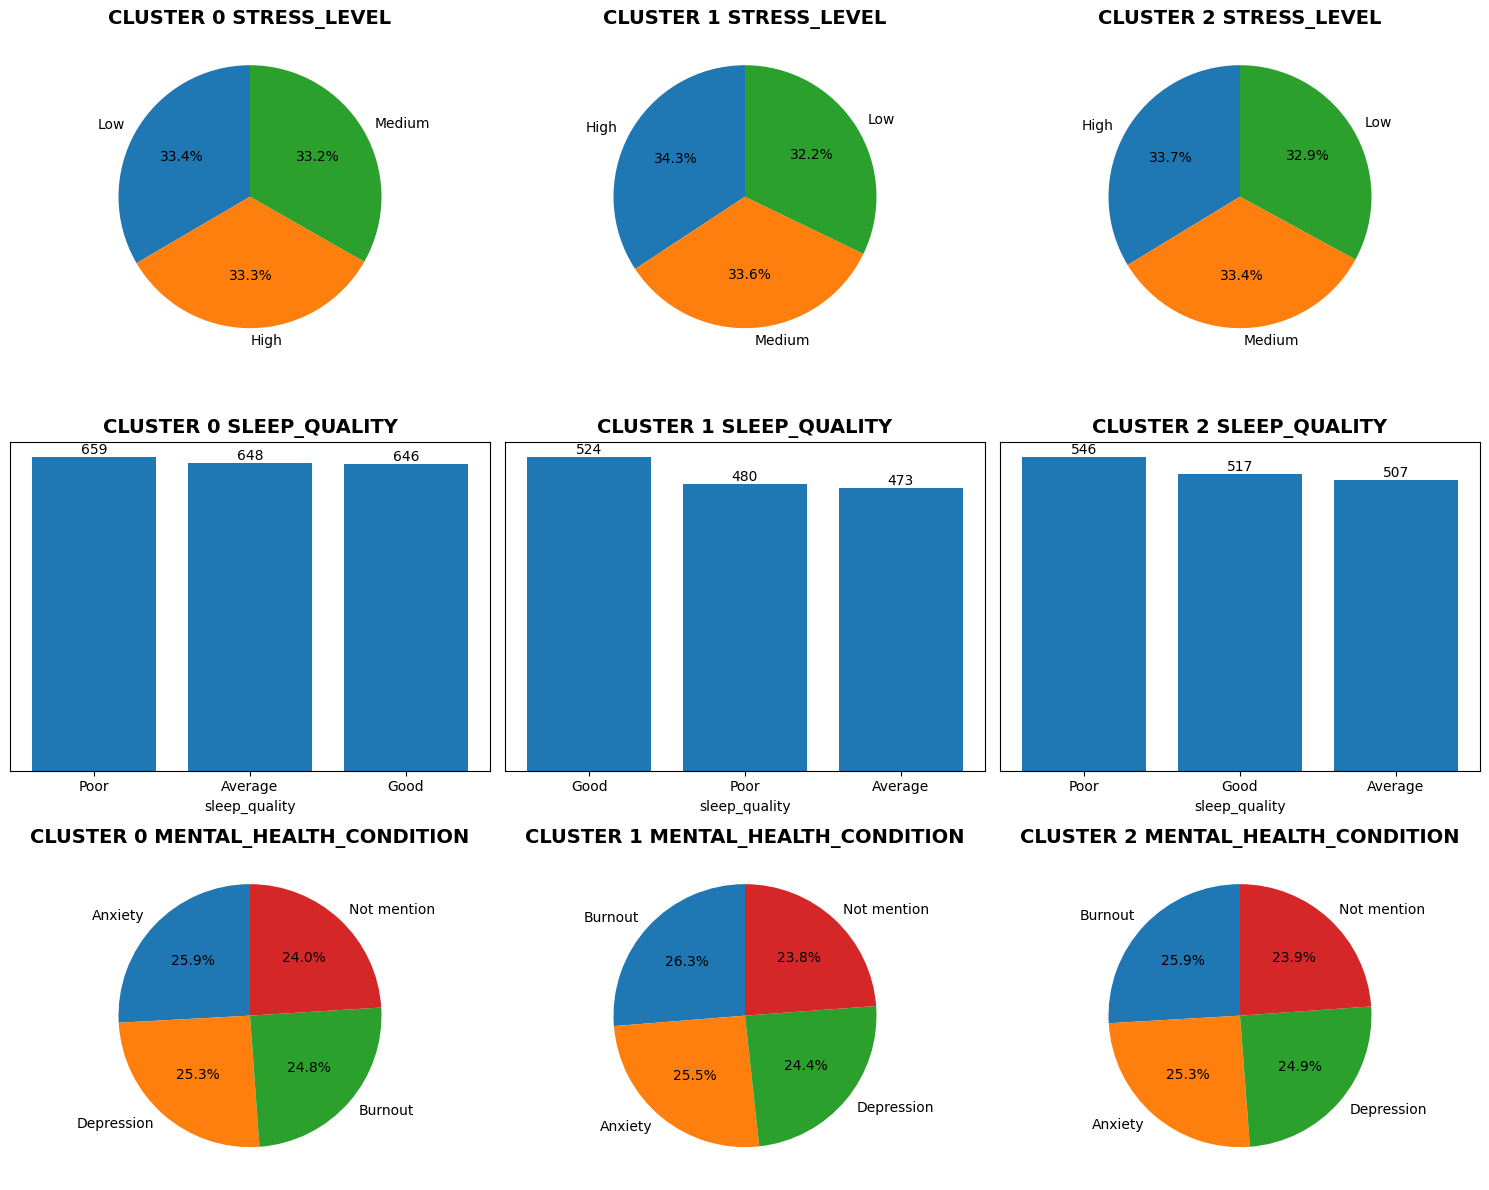

In [31]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
pie_chart(clus_0, 'stress_level', axes[0, 0], 'cluster 0')
pie_chart(clus_1, 'stress_level', axes[0, 1], 'cluster 1')
pie_chart(clus_2, 'stress_level', axes[0, 2], 'cluster 2')




bar_plt(clus_0, 'sleep_quality', axes[1, 0], 'cluster 0')
bar_plt(clus_1, 'sleep_quality', axes[1, 1], 'cluster 1')
bar_plt(clus_2, 'sleep_quality', axes[1, 2], 'cluster 2')



pie_chart(clus_0, 'mental_health_condition', axes[2, 0], 'cluster 0')
pie_chart(clus_1, 'mental_health_condition', axes[2, 1], 'cluster 1')
pie_chart(clus_2, 'mental_health_condition', axes[2, 2], 'cluster 2')

plt.tight_layout()
plt.show()